# Detecting Fraudulent Credit Card Activity
## Using Imbalanced Data
---
Raw data pulled from [Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud/data)

Original data credited to: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

---
##### This notebook is broken up into two primary sections:
* Exploratory Data Analysis
* Model Fitting & Tuning

# Exploratory Data Analysis

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
cc_fraud = pd.read_csv('./data/creditcard.csv')

In [3]:
cc_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


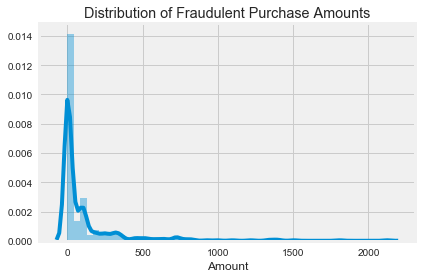

In [4]:
sns.distplot(cc_fraud[(cc_fraud['Class'] == 1)].Amount);
plt.title('Distribution of Fraudulent Purchase Amounts');

In [5]:
cc_fraud['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

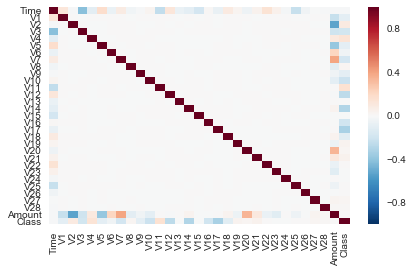

In [6]:

sns.heatmap(cc_fraud.corr());

In [6]:
corr_ranks = cc_fraud.corr()['Class']

In [7]:
ranked = np.abs(corr_ranks).sort_values(ascending=False)
print ranked

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64


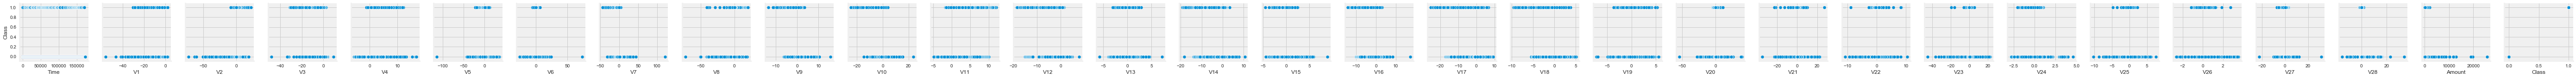

In [9]:
sns.pairplot(cc_fraud,x_vars=list(cc_fraud.columns),y_vars=['Class']);

In [10]:
top_features = list(ranked.index[1:11])
print list(top_features)

['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18']


In [11]:
top_features.append('Amount')

In [12]:
fraud = cc_fraud[(cc_fraud['Class']==1)]
not_fraud = cc_fraud[(cc_fraud['Class']==0)]

fraud_sample = fraud.sample(250)
not_fraud_sample = not_fraud.sample(250)

balanced = fraud_sample.append(not_fraud_sample)
balanced['Class'].value_counts()

1    250
0    250
Name: Class, dtype: int64

In [13]:
X = balanced[top_features]
y = balanced['Class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Logistic Regression
Examine the performance of a logistic regression model in trying to identify fraudulent credit card purchases.

In [15]:
logit = LogisticRegression()

logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
logit.score(X_test,y_test)

0.97599999999999998

In [54]:
# Calculate accuracy score, true positive rate, false positive rate for any model/dataset
def advanced_metrics(model,x,y):
    cfm = confusion_matrix(y,model.predict(x))
    print cfm
    score = model.score(x,y)
    tpr = cfm[1][1]/float(cfm[1][0]+cfm[1][1])
    fpr = cfm[0][1]/float(cfm[0][0]+cfm[0][1])
    print 'True Positive Rate: ', tpr
    print 'False Positive Rate: ', fpr
    print 'Accuracy Score: ', score
    return score,tpr,fpr

In [51]:
logit_test_score, logit_test_tpr, logit_test_fpr = advanced_metrics(logit,X_test,y_test)

[[74  1]
 [ 2 48]]
True Positive Rate:  0.96
False Positive Rate:  0.0133333333333
Accuracy Score:  0.976


## Performance Against Entire Dataset
Now we turn the model towards the entire original dataset (not just the class-balanced subset) and consider the logistic regression's performance.  We will consider the True Positive Rate and False Positive Rate of the classifier.

In [52]:
X_all = cc_fraud[top_features]
y_all = cc_fraud['Class']

In [53]:
logit_all_score, logit_all_tpr, logit_all_fpr = advanced_metrics(logit,X_all,y_all)

[[277187   7128]
 [    48    444]]
True Positive Rate:  0.90243902439
False Positive Rate:  0.0250707841655
Accuracy Score:  0.97480399007


[ 0.          0.00952381  0.00952381  0.00952381  0.00952381  0.00952381
  0.00952381  0.01904762  0.01904762  0.04761905  0.04761905  0.0952381
  0.0952381   0.42857143  0.42857143  0.4952381   0.4952381   0.61904762
  0.61904762  1.        ]
[ 0.          0.18947368  0.37894737  0.4         0.6         0.62105263
  0.90526316  0.90526316  0.93684211  0.93684211  0.95789474  0.95789474
  0.96842105  0.96842105  0.97894737  0.97894737  0.98947368  0.98947368
  1.          1.        ]
[  2.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   9.99999814e-01   9.99999783e-01   9.77223138e-01   9.43881776e-01
   7.23571472e-01   5.60169886e-01   4.44181088e-01   3.30421263e-01
   3.28409378e-01   8.90512426e-02   8.60070385e-02   7.10454790e-02
   6.98496584e-02   4.93693122e-02   4.85639658e-02   9.15451061e-05]


[]

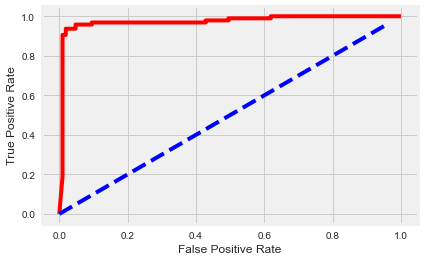

In [91]:
fpr, tpr, threshold = roc_curve(y_test, y_logit_pred_proba, pos_label=1)
print fpr
print tpr
print threshold
plt.plot(fpr,tpr,color='red');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.plot(np.arange(0,1,.05), np.arange(0,1,.05), 'b--');
plt.plot()

# Random Forest Classifier

Max Depth:  1
[[75  0]
 [ 7 43]]
True Positive Rate:  0.86
False Positive Rate:  0.0
Accuracy Score:  0.944
----------------------------------------------------
Max Depth:  2
[[74  1]
 [ 5 45]]
True Positive Rate:  0.9
False Positive Rate:  0.0133333333333
Accuracy Score:  0.952
----------------------------------------------------
Max Depth:  3
[[74  1]
 [ 5 45]]
True Positive Rate:  0.9
False Positive Rate:  0.0133333333333
Accuracy Score:  0.952
----------------------------------------------------
Max Depth:  4
[[74  1]
 [ 4 46]]
True Positive Rate:  0.92
False Positive Rate:  0.0133333333333
Accuracy Score:  0.96
----------------------------------------------------
Max Depth:  5
[[74  1]
 [ 4 46]]
True Positive Rate:  0.92
False Positive Rate:  0.0133333333333
Accuracy Score:  0.96
----------------------------------------------------
Max Depth:  6
[[73  2]
 [ 5 45]]
True Positive Rate:  0.9
False Positive Rate:  0.0266666666667
Accuracy Score:  0.944
--------------------------------

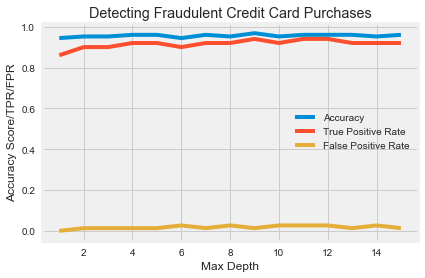

In [45]:
max_depth_range = range(1,16)
scores = []
fprs = []
tprs = []

for depth in max_depth_range:
    rf_class = RandomForestClassifier(n_estimators=100, max_depth=depth)
    rf_class.fit(X_train,y_train)
    y_rf_pred = rf_class.predict(X_test)
    score = rf_class.score(X_test,y_test)
    print 'Max Depth: ', depth
    score,tpr,fpr = advanced_metrics(rf_class,X_test,y_test)
    print '----------------------------------------------------'
    tprs.append(tpr)
    fprs.append(fpr)
    scores.append(score)
    
plt.plot(max_depth_range,scores, label='Accuracy');
plt.plot(max_depth_range,tprs, label='True Positive Rate');
plt.plot(max_depth_range,fprs, label='False Positive Rate');
plt.xlabel('Max Depth');
plt.title('Detecting Fraudulent Credit Card Purchases')
plt.ylabel('Accuracy Score/TPR/FPR');
plt.legend();

In [55]:
rf = RandomForestClassifier(n_estimators=100, max_depth=9)
rf.fit(X_train,y_train)
print 'Calculating performance metrics on entire balanced dataset...'
bal_score,bal_tpr,bal_fpr = advanced_metrics(rf,X,y)
print '----------------------------------------------------'
print 'Calculating performance metrics on entire original dataset...'
all_score,all_trp,all_fpr = advanced_metrics(rf,X_all,y_all)


Calculating performance metrics on entire balanced dataset...
[[248   2]
 [  5 245]]
True Positive Rate:  0.98
False Positive Rate:  0.008
Accuracy Score:  0.986
----------------------------------------------------
Calculating performance metrics on entire original dataset...
[[273396  10919]
 [    27    465]]
True Positive Rate:  0.94512195122
False Positive Rate:  0.0384045864622
Accuracy Score:  0.961566955868


In [49]:
# Compute feature importances.
pd.DataFrame({'feature':top_features, 'importance':rf.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
1,V14,0.208682
2,V12,0.165420
7,V11,0.129696
3,V10,0.124789
8,V4,0.108948
0,V17,0.106935
4,V16,0.057331
6,V7,0.029974
10,Amount,0.026410
5,V3,0.022962


In [56]:
rf_data = cc_fraud.copy()
rf_data['rf_pred'] = rf.predict(X_all)

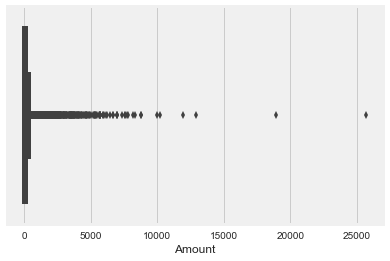

In [71]:
fps = rf_data[(rf_data.rf_pred == 1) & (rf_data['Class'] == 0)]
sns.boxplot(fps.Amount);

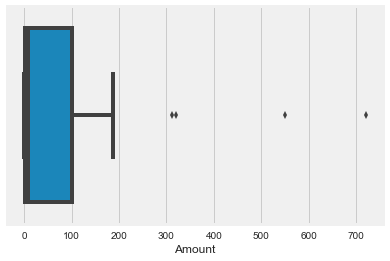

In [72]:
fns = rf_data[(rf_data.rf_pred == 0) & (rf_data['Class'] == 1)]
sns.boxplot(fns.Amount);

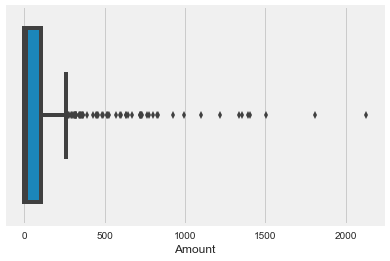

In [74]:
tps = rf_data[(rf_data.rf_pred == 1) & (rf_data['Class'] == 1)]
sns.boxplot(tps.Amount);